<a href="https://colab.research.google.com/github/jonasgr5/SDS_PHD_2020_JFG/blob/main/Gr%C3%B8nvad_sdsphd20_portfolio_assignments_tuesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio for SDSPhD20 filled out by Jonas Følsgaard Grønvad

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 


*   Listepunkt

*   Listepunkt
*   Listepunkt


*   Listepunkt


**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [158]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})
import numpy as np #Numpy for linear algebra & co

from IPython.display import HTML #Youtube embed

In [159]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

**My solution to "unsupervised machine learning with penguins"**

**1. Inspection of penguin data**

In [160]:
# You solutions from here...

# first we inspect the head of the data by calling head() method and storing the output as a new variable 
penguins_top = penguins.head() 
  
# display 
penguins_top 

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [161]:
# We also use .dtype to explore the datatype in the dataset - we see that our data consist of both objects and floats
penguins.dtypes

species_short         object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [162]:
# We generate some statistics to get familiar with the data

# percentile list 
perc =[.20, .40, .60, .80] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 

# calling describe method 
desc = penguins.describe(percentiles = perc, include = include) 
  
# display 
desc 

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
20%,NaN,NaN,38.340000,15.000000,188.000000,3475.000000,NaN
40%,NaN,NaN,42.000000,16.800000,194.000000,3800.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN


In [163]:
### What do we see ###
# We have a data set that consist of both object (e.g. island and sex) and floats (e.g. culmen_length). 
# The floats variables have very different means and standard diviations. This need to be addressed later to prepare the data for further analysis.

**2. Use some standard visualizations (eg. from seaborn) to express some properties of the data**

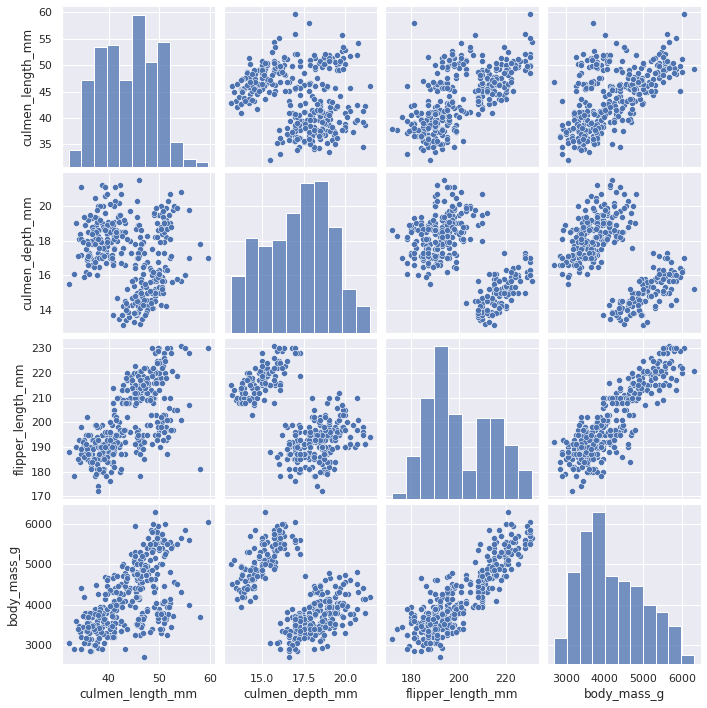

In [164]:
# we use sns.pairplot(data) to visualize relations between some of the core variable used later in the Principal Component Analysis (PCA)
sns.pairplot(penguins) 

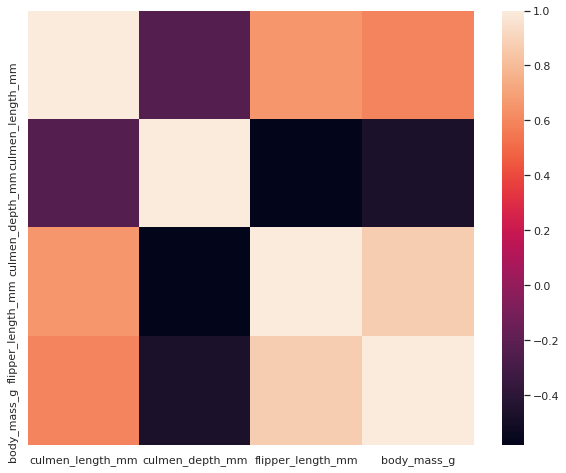

In [165]:
# We also plot a heatmap that can show  how the core varaibles are correlated. 
sns.heatmap(penguins.corr())

**3. Create a new dataset where you scale all numeric values with the standardscaler.**

In [166]:
# We now have to prepare the data for the later analysis 

# First we transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)

penguins.set_index('species_short', inplace=True)
penguins.set_index('island', inplace=True)
penguins.set_index('sex', inplace=True)



In [167]:
# We then import the standard scaler
from sklearn.preprocessing import StandardScaler

In [168]:
## Here we use the standard scaler on the penguin data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(penguins)

In [169]:
# We then look a at the mean and standard diviation before scaling...
pd.DataFrame(penguins, columns=penguins.columns).describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [174]:
# ... and after scaling
pd.DataFrame(data_scaled, columns=penguins.columns).describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,-9.024620e-17,-1.793562e-15,-6.395144e-16,8.894769e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


**4. Perform a PCA analysis**

In [175]:
# We import the PCA functions
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library

In [176]:
# We instantiate a PCA object
model = PCA()

In [177]:
# We fit the model # NB! I know it will create a error message :)
model.fit(data_scaled)

ValueError: ignored

In [179]:
# OH NO! We got an error message that input contains NaNs - we have to fix that

# This function will help us on the way.
def floater(x):
  try: #Try to
    return float(x) #Turn X into a floating point number
  except ValueError: #In case a ValueError occurs
    return np.nan #Turn X into np.nan (missing value placeholder)

In [180]:
# Map applies the defined function to every observation
penguins.loc[:,'culmen_length_mm'] = penguins['culmen_length_mm'].map(floater)
penguins.loc[:,'culmen_depth_mm'] = penguins['culmen_depth_mm'].map(floater)
penguins.loc[:,'flipper_length_mm'] = penguins['flipper_length_mm'].map(floater)
penguins.loc[:,'body_mass_g'] = penguins['body_mass_g'].map(floater)

In [181]:
# We detect some missing data in all four collums
penguins.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [182]:
# Here I import the imputation package that can help us with the missing values
from fancyimpute import SoftImpute, SimpleFill

In [183]:
# I choose to just replace missing values by the mean of the column
data_imp = SimpleFill(fill_method='mean').fit_transform(penguins)

In [184]:
# We can have a quick look
pd.DataFrame(data_imp, columns=penguins.columns).head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [185]:
# Okay we now try to scale the data again
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imp)

In [186]:
# We can compare the new scaling
pd.DataFrame(data_scaled, columns=penguins.columns).describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02
mean,-7.061535e-16,2.375361e-16,-6.890483e-16,4.040695e-16
std,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00
min,-2.174858e+00,-2.060444e+00,-2.065333e+00,-1.880837e+00
25%,-8.548868e-01,-7.889322e-01,-7.796428e-01,-8.162745e-01
50%,6.035444e-02,7.569585e-02,-2.796522e-01,-1.900612e-01
75%,8.422188e-01,7.877425e-01,8.631834e-01,6.866374e-01
max,2.884265e+00,2.211836e+00,2.148873e+00,2.627899e+00


In [187]:
# Instantiate a PCA object
model = PCA(n_components=4) # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [188]:
# Fit and transform the data
data_reduced = model.fit_transform(data_scaled)

In [189]:
# Make sure the data shape is as it should be
data_reduced.shape

(344, 4)

**5. Investigate the explained variance of the components... do we see an 'elbow'?**

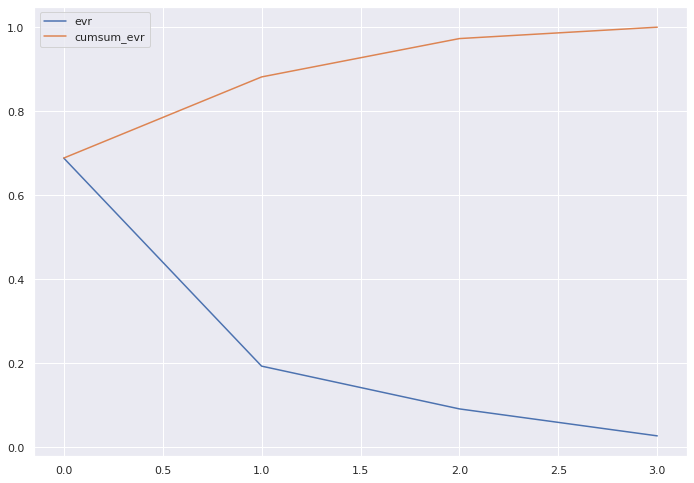

In [190]:
# We plot the data for the first four component to see if we can see an albow. it seems like two components explain much of the variance.
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [191]:
# We run it again with only two components
model = PCA(n_components=2)
data_reduced = model.fit_transform(data_scaled)

In [192]:
# How mach "information" do we kick out? Not much. We explain 88% of the variance.
model.explained_variance_ratio_.sum()

0.881567969437263

**6. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?**

In [193]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=penguins.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

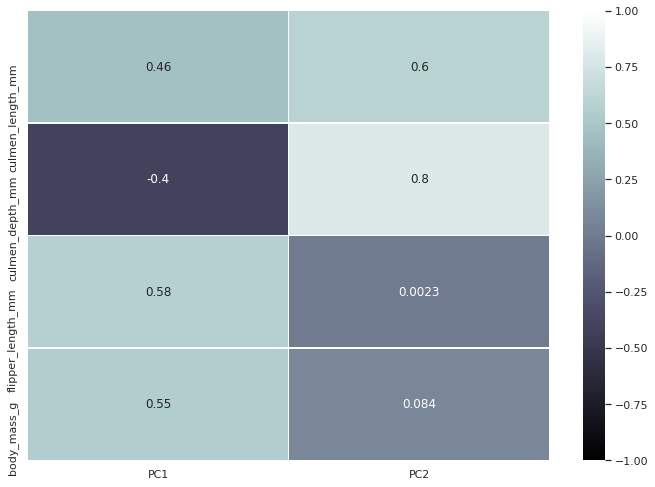

In [194]:
# We generate a heatmap to have a look at the variables explaining much of the variance on the two components.
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


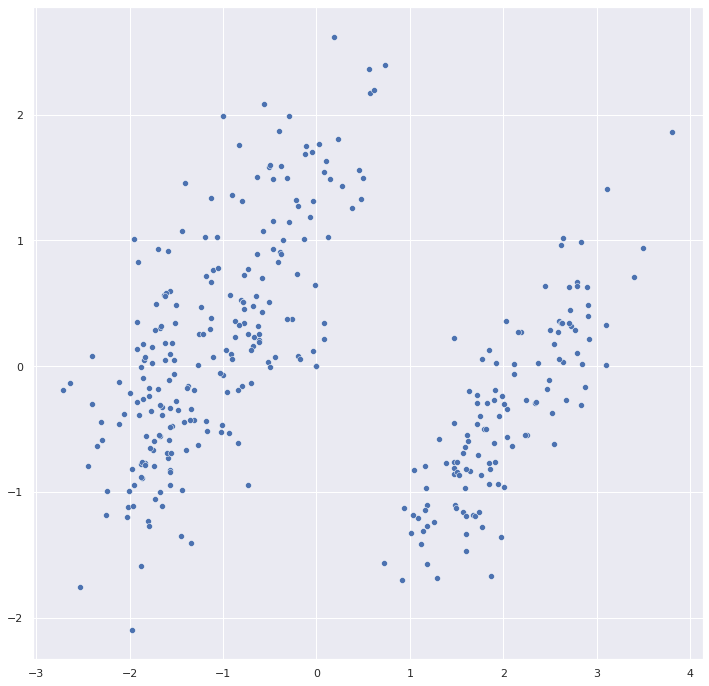

In [195]:
# we import the necesary packadge
import matplotlib.pyplot as plt # standard plotting library

# Now we can plot in our points
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

In [196]:
# we import altair
import altair as alt

In [197]:
# We have to reload the dataset as I kick out variable needed
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [198]:
# Define the data that we are going to use as a dataframe
d = pd.DataFrame({'y': data_reduced[:,1],
                 'x': data_reduced[:,0],
                 'species': penguins['species_short'],  
                 'island': penguins['island'],
                 'sex': penguins['sex']})

In [199]:
# We generate some maps to explore the data here colored by species

alt.Chart(d).mark_point().encode(
    x='x',
    y='y',
    color='species',
    tooltip=['species', 'island', 'sex']
).interactive()

alt.Chart(...)

In [87]:
# And by island
alt.Chart(d).mark_point().encode(
    x='x',
    y='y',
    color='island',
    tooltip=['species', 'island', 'sex']
).interactive()

alt.Chart(...)

In [88]:
# And by sex
alt.Chart(d).mark_point().encode(
    x='x',
    y='y',
    color='sex',
    tooltip=['species', 'island', 'sex']
).interactive()

# NB this plot show an error in the sex variable that contains null and . values. We will try to get rid of these in the next exercise.

alt.Chart(...)

**7. Inspect the correlation between the components. Which variables are they mostly associated with?**

In [91]:
# Looking at the different graphs we find that...

## The fist component is positively correlated with body mass and flipper and culmen length. It is negatively correlated with culmen depth
## The varition found on the first axis seems to be correlated with gender.
## The second component is correlated with culmen depth and length. 
## The second component is positively correlated with species that lives in Biscoe and belong to the gentoo species. They seem to be characterized by their culmens that are longer and have more depth.

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [200]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [201]:
# load the dataset from GitHub - original source
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

**1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?**

In [202]:
# You solutions from here...

# first we inspect the head of the data by calling .head() and storing the output as a new variable 
penguins_top = penguins.head() 
  
# we display the data
penguins_top

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [203]:
# We then look at the data type and counts. We can see that we have 3 objects and 4 floats 
# Some of the variable seems to contain missing values
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [204]:
# We look at some basic statistic with the function discribe ()
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data**

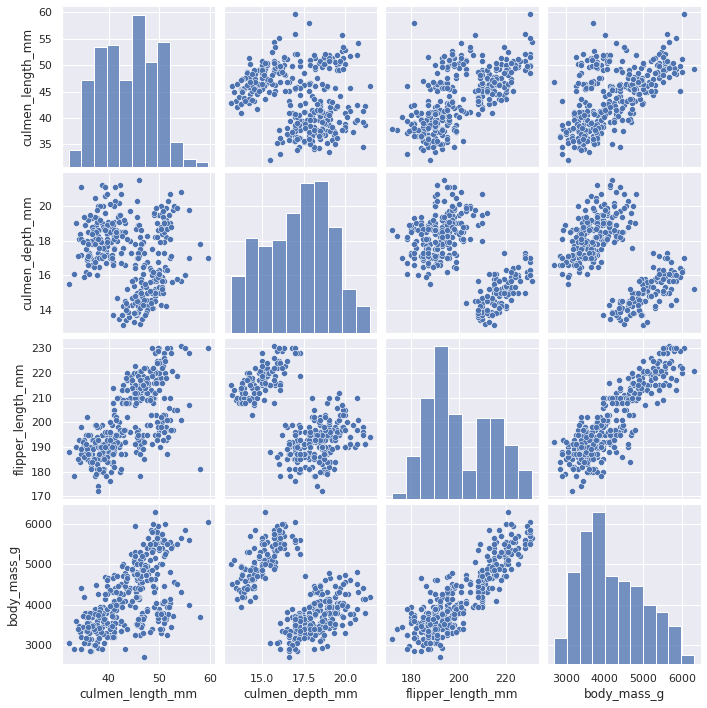

In [205]:
# we use sns.pairplot(data) to visualize relations between some of the core variable used later
sns.pairplot(penguins) 

**3. Apply standard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)**

In [206]:
# We earlier got an error message that input contains NaNs -

# This function will help us
def floater(x):
  try: #Try to
    return float(x) #Turn X into a floating point number
  except ValueError: #In case a ValueError occurs
    return np.nan #Turn X into np.nan (missing value placeholder)

In [208]:
# map applies the defined function to every observation
penguins.loc[:,'culmen_length_mm'] = penguins['culmen_length_mm'].map(floater)
penguins.loc[:,'culmen_depth_mm'] = penguins['culmen_depth_mm'].map(floater)
penguins.loc[:,'flipper_length_mm'] = penguins['flipper_length_mm'].map(floater)
penguins.loc[:,'body_mass_g'] = penguins['body_mass_g'].map(floater)

In [209]:
# We find some missing data in five variables
penguins.isnull().sum()

species_short         0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [210]:
# We create two new dataset to clean our variables - the float and object variables seperately
vars_analysis = ["culmen_length_mm", "culmen_depth_mm","flipper_length_mm","body_mass_g"]
object_variables = ["sex", "island","species_short"]

In [211]:
# We first choose the float variables
data = penguins[vars_analysis]

In [212]:
# We load in soft impute function
from fancyimpute import SoftImpute, SimpleFill # Import the imputation package

In [213]:
# I choose to just replace missing values for the float variables by their mean of the column - here we fill missing values
data_imp = SimpleFill(fill_method='mean').fit_transform(data)

In [214]:
# We then import the standard scaler
from sklearn.preprocessing import StandardScaler

In [215]:
# Now we scale the data
scaler = StandardScaler()
data_imp = scaler.fit_transform(data_imp)

In [216]:
# I convert the data back to pd.dataframe
data_imp = pd.DataFrame(data_imp)

In [217]:
data_imp

,0,1,2,3
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,-1.307172e-15,1.806927e-15,0.000000,0.000000
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517
...,...,...,...,...
339,-1.307172e-15,1.806927e-15,0.000000,0.000000
340,5.294731e-01,-1.450118e+00,1.006038,0.811880
341,1.191758e+00,-7.380718e-01,1.506028,1.939064
342,2.351241e-01,-1.195816e+00,0.791756,1.250229


In [218]:
# Now we choose the object variables
data2 = penguins[object_variables]

In [219]:
# First we look at values and type for sex -> the sign "." is a error and need to be removed
data2.value_counts(['sex'])

sex   
MALE      168
FEMALE    165
.           1
dtype: int64

In [220]:
# We import the numpy package in order to use the .replace function
import numpy as np

In [121]:
# Replace "." with NaN
data2 = data2.replace({".": np.NaN})

In [221]:
# Look at values for sex again - this looks good. No weird values
data2.value_counts(['sex'])

sex   
MALE      168
FEMALE    165
.           1
dtype: int64

In [222]:
# Look at values for island - this looks good. No weird values
data2.value_counts(['island'])

island   
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

In [223]:
# Look at values for species_short - this looks good. No weird values
data2.value_counts(['species_short'])

species_short
Adelie           152
Gentoo           124
Chinstrap         68
dtype: int64

In [224]:
# concat our cleaned dataframes again
penguins_clean = pd.concat([data_imp, data2], axis=1)

In [225]:
penguins_clean

,0,1,2,3,sex,island,species_short
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,MALE,Torgersen,Adelie
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,FEMALE,Torgersen,Adelie
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,FEMALE,Torgersen,Adelie
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,NaN,Torgersen,Adelie
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,FEMALE,Torgersen,Adelie
...,...,...,...,...,...,...,...
339,-1.307172e-15,1.806927e-15,0.000000,0.000000,NaN,Biscoe,Gentoo
340,5.294731e-01,-1.450118e+00,1.006038,0.811880,FEMALE,Biscoe,Gentoo
341,1.191758e+00,-7.380718e-01,1.506028,1.939064,MALE,Biscoe,Gentoo
342,2.351241e-01,-1.195816e+00,0.791756,1.250229,FEMALE,Biscoe,Gentoo


In [226]:
# We reasign headers that was lost in the process
penguins_clean.columns = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex','island','species_short']

In [227]:
# We inspect that the header are correct
penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island,species_short
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,MALE,Torgersen,Adelie
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,FEMALE,Torgersen,Adelie
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,FEMALE,Torgersen,Adelie
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,NaN,Torgersen,Adelie
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,FEMALE,Torgersen,Adelie
...,...,...,...,...,...,...,...
339,-1.307172e-15,1.806927e-15,0.000000,0.000000,NaN,Biscoe,Gentoo
340,5.294731e-01,-1.450118e+00,1.006038,0.811880,FEMALE,Biscoe,Gentoo
341,1.191758e+00,-7.380718e-01,1.506028,1.939064,MALE,Biscoe,Gentoo
342,2.351241e-01,-1.195816e+00,0.791756,1.250229,FEMALE,Biscoe,Gentoo


In [228]:
## We look at some info to inspect the data and non-null values - it looks good
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   sex                334 non-null    object 
 5   island             344 non-null    object 
 6   species_short      344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**4. Split the data in a train & test sample**

In [229]:
# Select the (independant) features that we are going to use to train the model - we have chosen all the numerical values.
X = penguins_clean.loc[:,'culmen_length_mm':'body_mass_g']

In [230]:
# Define the dependant variabel / target to predict (world region)
y = penguins_clean.species_short

In [231]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [232]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [233]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size = 0.2, random_state = 42)

**3. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.**

In [234]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [235]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [236]:
# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.98181818 0.98181818 0.96363636 1.         1.        ]


In [237]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.9710144927536232


In [144]:
# The overall accuracy with the logistic regression model is at 97% which is quite good. 

In [238]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        32
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [239]:
# As we can see the model did quite well in its prediction. The lowest precision value is 0.94 which is high. 
# It did especially for the Gentoo species that is also the species with the most unique features(insight from PCA)

In [240]:
# We can inspect the results visually
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

In [241]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f96d1e913c8>)

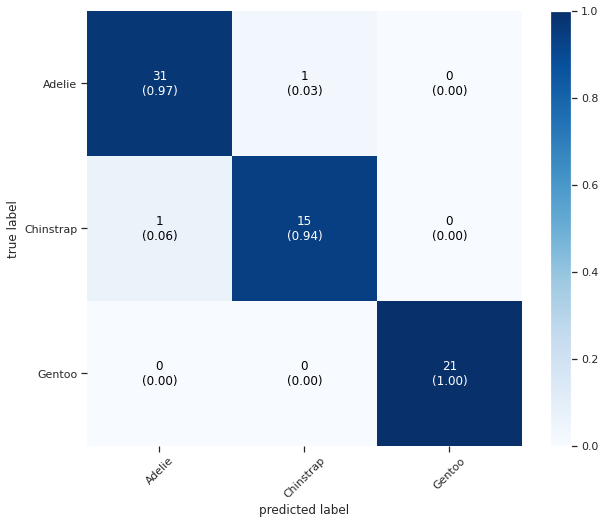

In [242]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

In [ ]:
# We can see that all gentoo was predicted correctly. Only one Adeline was predicted to be a Chinstrap and one Chinstrap was predicted to be a Adeline. 

In [243]:
### We can now try a more complex model - the random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.94545455 0.96363636 0.96363636 1.         1.        ]


In [244]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9420289855072463


In [245]:
# We can see that it actually proforms a little worse than the logistic regression model. 

In [153]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.97      0.94      0.95        32
   Chinstrap       0.88      0.94      0.91        16
      Gentoo       0.95      0.95      0.95        21

    accuracy                           0.94        69
   macro avg       0.93      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f96d1dbfd68>)

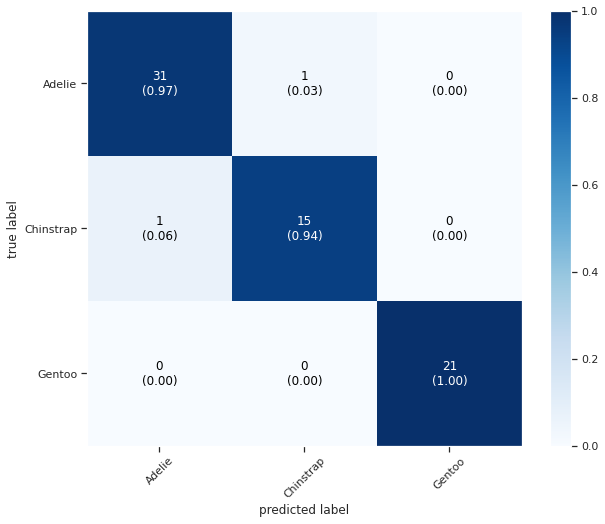

In [246]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

In [247]:
# We can see that the model place one more adelie as a gentoo.

In [248]:
# Finally, we try XGBoost (again we will use standard settings - i.e. no hyperameter tuning)
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.94545455 0.96363636 0.94545455 0.98181818 0.98181818]
0.9420289855072463


In [249]:
# This model proforms the worst with a score of 0.94

In [250]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.94      0.94      0.94        32
   Chinstrap       0.93      0.88      0.90        16
      Gentoo       0.95      1.00      0.98        21

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f96d1db0a20>)

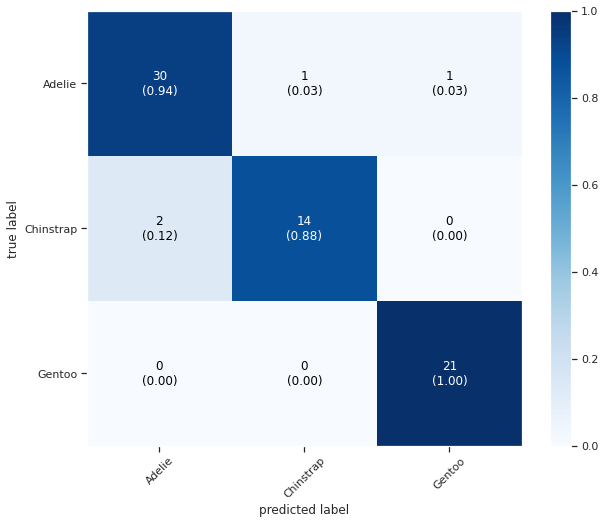

In [251]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

In [ ]:
# We can see that it makes the same mistakes as the previous model in its prediction by predicting an Adelie penguins to be a Gentoo and a Adelie penguin to be a chinstrap.
# It also place 2 Chinstrap as an Adelie.
# All the model gets the Gentoo species correct.